In [1]:
import xlrd
import numpy as np
import pandas as pd
import matplotlib
import random

In [2]:
def select_random_sheets(num_sheets, total_sheets, with_replacement):
    sequence = range(1,total_sheets+1)
    if with_replacement == True:
        sample = np.random.choice(sequence, num_sheets)
    else:
        sample = random.sample(sequence, num_sheets)
    return sample

def consolidate_sample_sheets(sample):
    sheetname = "Student " + str(sample[0])
#     print(sample)
#     print(sheetname)
    df = pd.read_excel(filename, sheet_name=sheetname, usecols='M:Q')
    for index in range(1, len(sample)):
        sheetname = "Student " + str(sample[index])
#         print(sheetname)
        df_temp = pd.read_excel(filename, sheet_name=sheetname, usecols='M:Q')
        df = df + df_temp
#     print(sample)
    df['Unnamed: 12'] = df['Unnamed: 12']//len(sample)
    return df

def running_average_two_rows(data_frame):
    lastdict = {'Unnamed: 12':[48], 'Difficult.2':[0], 'Easy.2':[0], 'Boring.2':[0], 'Engaging.2':[0]   }
    last_frame = pd.DataFrame(lastdict)
    data_frame = pd.concat([data_frame, last_frame], ignore_index = True)
    for index in range(len(data_frame)-1):
        data_frame.iloc[index] = ((data_frame.iloc[index] + data_frame.iloc[index+1]))/2
        data_frame.iloc[index] = (data_frame.iloc[index]).apply(np.ceil)
    data_frame['Unnamed: 12'] = data_frame['Unnamed: 12'] -1
    data_frame = data_frame.drop(len(data_frame)-1)
    data_frame['Unnamed: 12'][47] = data_frame['Unnamed: 12'][47] + 1   
    return data_frame

def calculate_net(data_frame):
    dict_temp = {'Timestamp': list(range(1, 49)), 'Net Engagement':[0]*48, 'Net Difficulty':[0]*48}
    net_value_data_frame = pd.DataFrame(dict_temp)
    net_value_data_frame['Net Engagement'] = data_frame['Engaging.2'] - data_frame['Boring.2']
    net_value_data_frame['Net Difficulty'] = data_frame['Difficult.2'] - data_frame['Easy.2']
    return net_value_data_frame

def calculate_net_percentages(net_value_data_frame, number_of_sheets):
    net_value_data_frame['Net Engagement'] = round((net_value_data_frame['Net Engagement']/number_of_sheets)*100)
    net_value_data_frame['Net Difficulty'] = round((net_value_data_frame['Net Difficulty']/number_of_sheets)*100)
    net_value_data_frame['Net Engagement'] = net_value_data_frame['Net Engagement'].astype('int')
    net_value_data_frame['Net Difficulty'] = net_value_data_frame['Net Difficulty'].astype('int')
    return net_value_data_frame

def calculateSSE(net_value_percent_population, net_value_percent_sample):
    dict_temp = {'Timestamp': list(range(1, 49)), 'Net Engagement':[0]*48, 'Net Difficulty':[0]*48}
    error_data_frame = pd.DataFrame(dict_temp)
    error_data_frame['Net Engagement'] = net_value_percent_population['Net Engagement'] - net_value_percent_sample['Net Engagement']
    error_data_frame['Net Difficulty'] = net_value_percent_population['Net Difficulty'] - net_value_percent_sample['Net Difficulty']
#     print(error_data_frame)
    error_data_frame['Net Engagement'] = error_data_frame['Net Engagement']**2
    error_data_frame['Net Difficulty'] = error_data_frame['Net Difficulty']**2
#     print(error_data_frame)
    net_engagement_sse = error_data_frame['Net Engagement'].sum()
    net_difficulty_sse = error_data_frame['Net Difficulty'].sum()
#     print(net_engagement_sse, net_difficulty_sse)
    return net_engagement_sse, net_difficulty_sse
    
    

<AxesSubplot:xlabel='Timestamp'>

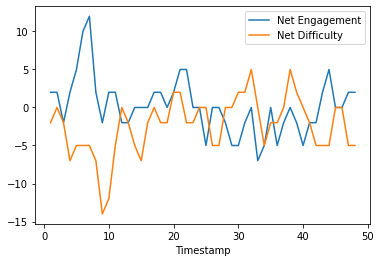

In [3]:
filename = "2. DEBE_Mock data.xlsx"

total_number_of_students = 42
sample_number_of_students = 42

samples_list = select_random_sheets(num_sheets = sample_number_of_students, total_sheets = total_number_of_students, with_replacement=False)
df_consolidated =consolidate_sample_sheets(samples_list)
df_consolidated_averaged = running_average_two_rows(df_consolidated)
net_values = calculate_net(df_consolidated_averaged)
net_values_percent = calculate_net_percentages(net_values, sample_number_of_students)
net_values_percent.plot('Timestamp', ['Net Engagement', 'Net Difficulty'])                  


<AxesSubplot:xlabel='Timestamp'>

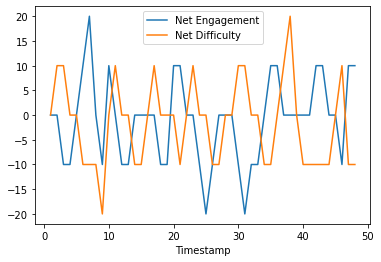

In [4]:
 SSE_data_frame = pd.DataFrame({'Timestamp': list(range(10, 43)), 'Error Engagement':[0]*33, 'Error Difficulty':[0]*33})

In [5]:
# for sample_number in range(10, 43):
#     samples_list = select_random_sheets(num_sheets = sample_number, total_sheets = total_number_of_students, with_replacement=False)
#     df_consolidated_sample =consolidate_sample_sheets(samples_list)
#     df_consolidated_sample_averaged = running_average_two_rows(df_consolidated_sample)
#     net_values_sample = calculate_net(df_consolidated_sample_averaged)
#     net_values_sample_percent = calculate_net_percentages(net_values_sample, sample_number)
#     net_engagement_sse, net_difficulty_sse = calculateSSE(net_values_percent, net_values_sample_percent)
#     print(net_engagement_sse, net_difficulty_sse)


1951 1886
1873 1700
2181 1525
1360 1060
1212 1339
1207 1315
847 650
1495 734
895 1047
551 437
831 666
336 721
681 617
364 404
407 595
335 478
344 292
431 554
291 303
255 161
153 203
197 233
217 173
106 185
133 134
152 152
182 115
86 92
75 126
143 78
42 66
22 9
0 0
